In [52]:
%matplotlib inline

from statsbombpy import sb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from mplsoccer import VerticalPitch, FontManager, Sbopen
import seaborn as sns
from matplotlib.colors import to_rgba, LinearSegmentedColormap

In [34]:
df = sb.events(match_id=3835329)

In [35]:
dfFin = df[df["team"] == "WNT Finland"]
dfDen = df[df["team"] == "Denmark Women's"]

In [36]:
pitchColor = "#7FB069"
figColor = "#7FB069"

In [37]:
lineup = sb.lineups(match_id=3835329)["Denmark Women's"]
lineup = lineup.drop("cards", axis=1)
lineup = lineup.drop("player_nickname", axis=1)
lineup = lineup.drop("country", axis=1)
lineup = lineup.rename(columns={'player_id': 'passer'})
lineup = lineup.sort_values("passer", ascending=True)

In [7]:
first_half = df.loc[:1808, :]
second_half = df.loc[1809:3551, :]

In [38]:
shots = second_half[second_half.type == "Shot"]
shots = shots[shots.team == "Denmark Women's"]

shots = shots[['team', 'player', 'minute', 'second', 'location', 'shot_statsbomb_xg', 'shot_outcome', "type"]]

shots['x'] = shots.location.apply(lambda x: x[0])
shots['y'] = shots.location.apply(lambda x: x[1])
shots = shots.drop('location', axis=1)


shots_fin = second_half[second_half.type == "Shot"]
shots_fin = shots_fin[shots_fin.team == "WNT Finland"]

shots_fin = shots_fin[['team', 'player', 'minute', 'second', 'location', 'shot_statsbomb_xg', 'shot_outcome', "type"]]

shots_fin['x'] = shots_fin.location.apply(lambda x: x[0])
shots_fin['y'] = shots_fin.location.apply(lambda x: x[1])
shots_fin = shots_fin.drop('location', axis=1)

goals_fin = shots_fin[shots_fin.shot_outcome == 'Goal']
shots_fin = shots_fin[shots_fin.shot_outcome != 'Goal']
goals = shots[shots.shot_outcome == 'Goal']
shots = shots[shots.shot_outcome != 'Goal']

goals["player"] = goals["player"].apply(lambda x: str(x).split()[-1])
goals_fin["player"] = goals_fin["player"].apply(lambda x: str(x).split()[-1])

In [39]:
score_fin = (goals_fin["shot_outcome"]=='Goal').sum()
score_den = (goals["shot_outcome"]=='Goal').sum()

In [40]:
goalScorer = (goals["player"]).sum()
goalScorer

'Harder'

In [41]:
xgDen = shots["shot_statsbomb_xg"].sum()
xgDen = str(round(xgDen, 2))
xgFin = shots_fin["shot_statsbomb_xg"].sum()
xgFin = str(round(xgFin, 2))

In [42]:
compPassesDen = pass_den.shape[0]
compPassesFin = pass_fin.shape[0]

shotsDen = shots.shape[0]
shotsFin = shots_fin.shape[0]

In [43]:
print("    Fulltime score:")
print("Denmark:", score_den, "-","Finland:", score_fin)
print("Xg:    ", xgDen,"  -  ", xgFin)
print("Passes:",compPassesDen,"  -  ", compPassesFin)
print("shots: ", shotsDen,"   -  ", shotsFin)

    Fulltime score:
Denmark: 1 - Finland: 0
Xg:     1.6   -   0.25
Passes: 435   -   331
shots:  18    -   9


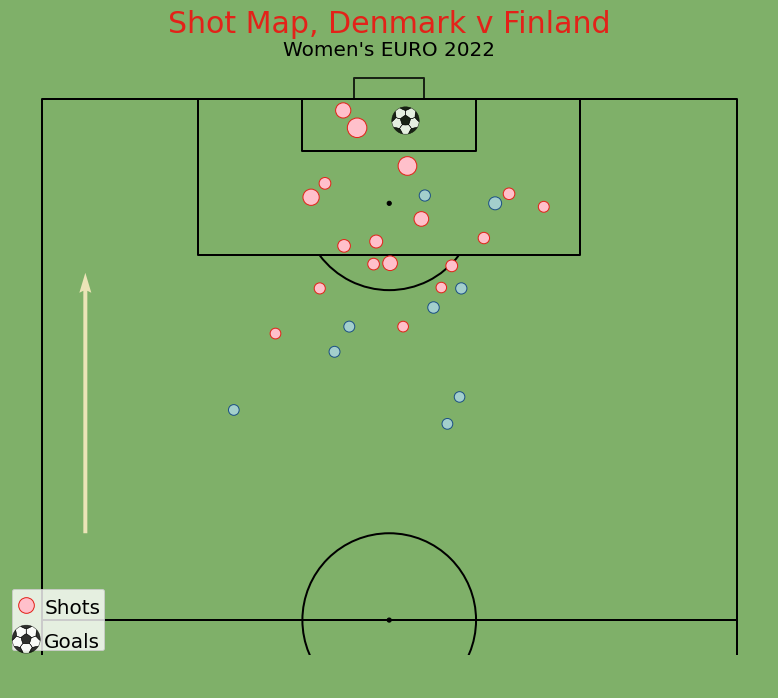

In [44]:
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type="box", goal_alpha=0.8, pitch_color=pitchColor, line_color='black')
fig,axs= pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False,title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor(figColor)

scatter_shots = pitch.scatter(shots.x, shots.y, s=(shots.shot_statsbomb_xg * 900) + 100, c='pink', edgecolors='#E32219', marker='o', alpha = 1, ax=axs['pitch'], label = "Shots")

scatter_goals= pitch.scatter(goals.x, goals.y, s=(goals.shot_statsbomb_xg * 900) + 100, c="white", marker="football", ax=axs["pitch"], alpha = .80, label = "Goals")

scatter_shots_fin = pitch.scatter(shots_fin.x, shots_fin.y, s=(shots_fin.shot_statsbomb_xg * 900) + 100, c='lightblue', edgecolors='#003581', marker='o', alpha = .80, ax=axs['pitch'])


pitch.arrows(70, 5, 100, 5, ax=axs["pitch"], color="#ECE4B7")

axs["title"].text (0.5, 0.7, "Shot Map, Denmark v Finland", color="#E32219", va="center", ha="center", fontsize=30)

axs["title"].text (0.5, 0.25, "Women's EURO 2022", color="black", va="center", ha="center", fontsize=20)

legend = axs['pitch'].legend(loc='lower left', labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontsize(20)
    text.set_va('center')
    
#plt.savefig('Shot Map, Denmark v Finaland', dpi=300)

In [45]:
pass_den = first_half[first_half.type == "Pass"]
pass_den = pass_den[pass_den.team == "Denmark Women's"]
pass_den = pass_den[pass_den["pass_type"]!="Kick Off"]
pass_den = pass_den[pass_den["pass_type"]!="Goal Kick"]
pass_den = pass_den[pass_den["pass_type"]!="Free Kick"]
pass_den = pass_den[pass_den["pass_type"]!="Throw-in"]
pass_den = pass_den[pass_den["pass_type"]!="Corner"]
pass_den = pass_den[pass_den["pass_outcome"]!="Incomplete"]
pass_den = pass_den[pass_den["pass_outcome"]!="Pass Offisde"]
pass_den = pass_den[pass_den["pass_outcome"]!="Out"]
pass_den = pass_den[pass_den["pass_outcome"]!="Unknown"]
pass_den = pass_den[['team', 'player', "player_id", 'minute', 'second', 'location', "pass_type", "pass_outcome", "pass_end_location", "type", "pass_assisted_shot_id"]]

pass_den['x_start'] = pass_den.location.apply(lambda x: x[0])
pass_den['y_start'] = pass_den.location.apply(lambda x: x[1])

pass_den['x_end'] = pass_den.pass_end_location.apply(lambda x: x[0])
pass_den['y_end'] = pass_den.pass_end_location.apply(lambda x: x[1])
pass_den = pass_den.drop('location', axis=1)
pass_den = pass_den.drop('pass_end_location', axis=1)

In [46]:
passHarder = first_half[first_half["player"]=="Pernille Mosegaard Harder"]
passHarder = passHarder[passHarder["type"]== "Pass"]
passHarder = passHarder[passHarder["pass_outcome"]!="Incomplete"]
passHarder = passHarder[passHarder["pass_outcome"]!="Out"]
passHarder = passHarder[['team', 'player', "player_id", 'minute', 'second', 'location', "pass_type", "pass_outcome", "pass_end_location", "type"]]

passHarder['x_start'] = passHarder.location.apply(lambda x: x[0])
passHarder['y_start'] = passHarder.location.apply(lambda x: x[1])

passHarder['x_end'] = passHarder.pass_end_location.apply(lambda x: x[0])
passHarder['y_end'] = passHarder.pass_end_location.apply(lambda x: x[1])
passHarder = passHarder.drop('location', axis=1)
passHarder = passHarder.drop('pass_end_location', axis=1)

Text(0.5, 1.0, 'Pass Map Denmark v Finland')

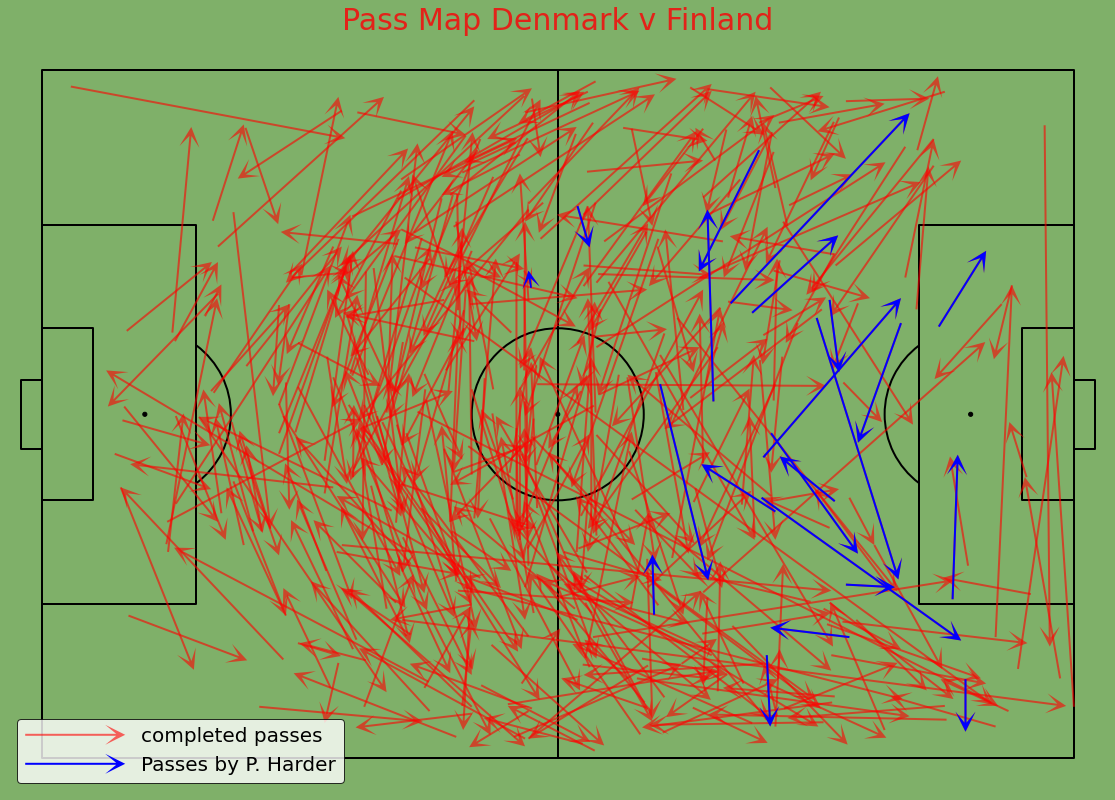

In [47]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color='black', goal_type="box",)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


pitch.arrows(pass_den.x_start, pass_den.y_start,
             pass_den.x_end, pass_den.y_end, width=2,
             headwidth=10, headlength=10, color='red', ax=ax, label='completed passes', alpha = .60)

pitch.arrows(passHarder.x_start, passHarder.y_start,
             passHarder.x_end, passHarder.y_end, width=2,
             headwidth=10, headlength=10, color='Blue', ax=ax, label='Passes by P. Harder', alpha = 1)


ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=20, loc='lower left')


ax.set_title("Pass Map Denmark v Finland", fontsize=30, color="#E32219")

#plt.savefig('Pass Map, Denmark v Finaland', dpi=300)

In [48]:
pass_den_map = pass_den

pass_den_map["passer"] = pass_den_map["player_id"]
pass_den_map["recipient"] = pass_den_map["player_id"].shift(-1)

subs = dfDen[dfDen["type"] =="Substitution"]
subs = subs["minute"]
firstSub = subs.min()

pass_den_map = pass_den_map[pass_den_map["minute"]<firstSub]

firstSub

55

In [49]:
starting_player_numbers = ["9", "11", "10", "7", "13", "4", "20", "2", "3", "19", "1"]

average_locations = pass_den_map.groupby("passer").agg({"x_start":["mean"], "y_start": ["mean", "count"]})
average_locations.columns = ["x_start","y_start", "count", ]
average_locations["jersey_number"] = starting_player_numbers
average_locations.sort_values(by="passer", ascending=True)

harder_location = average_locations[average_locations["jersey_number"]== "10"]

pass_between = pass_den_map.groupby(["passer", "recipient"]).player_id.count().reset_index()
pass_between.rename({"player_id": "pass_count"},axis="columns", inplace=True)

pass_between = pass_between.merge(average_locations, left_on="passer", right_index = True)
pass_between = pass_between.merge(average_locations, left_on="recipient", right_index = True, suffixes=["","_end"])

MAX_LINE_WIDTH = 14
MAX_MARKER_SIZE = 3000
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locations['marker_size'] = (average_locations['count']
                                         / average_locations['count'].max() * MAX_MARKER_SIZE)
harder_location['marker_size'] = (average_locations['count']
                                         / average_locations['count'].max() * MAX_MARKER_SIZE)

MIN_TRANSPARENCY = 0.7
color = np.array(to_rgba('white'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

C:\Users\Gusse\AppData\Local\Temp\ipykernel_12264\660942509.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harder_location['marker_size'] = (average_locations['count']


Text(0.5, 1.0, 'Pass Network Denmark v Finland')

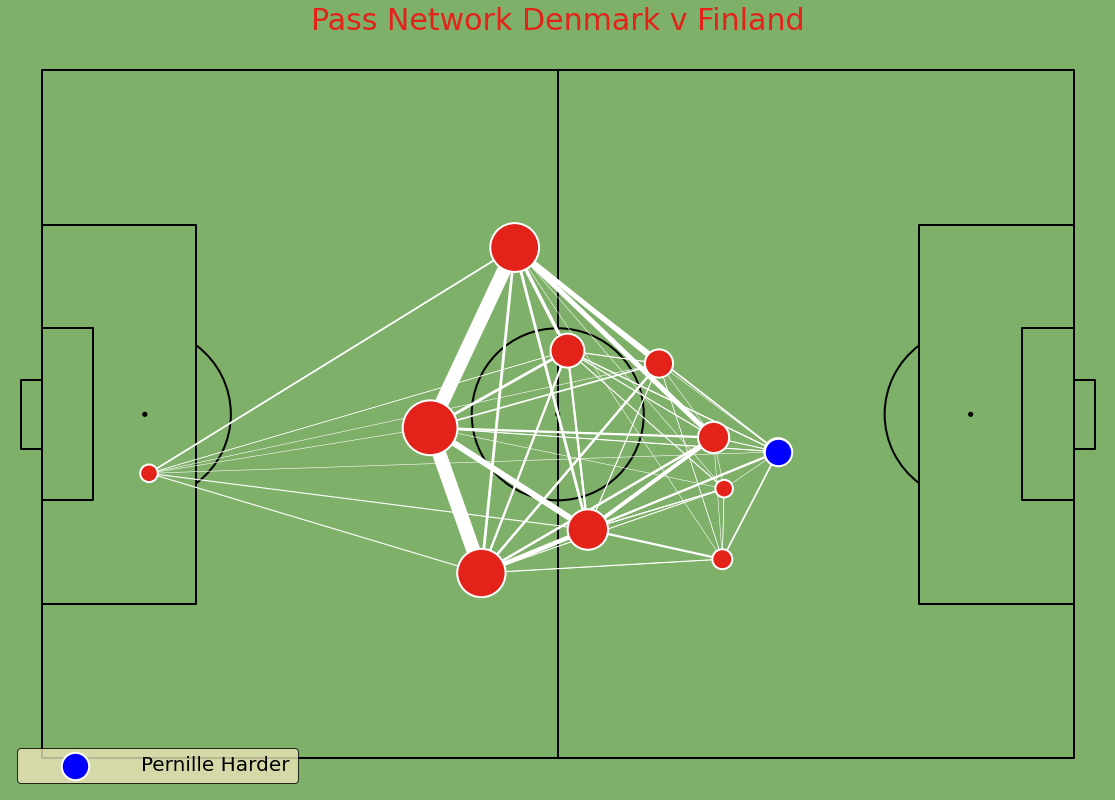

In [50]:
pitch = Pitch(pitch_type='statsbomb', goal_type="box", pitch_color=pitchColor, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)

pitch.arrows(70, 5, 100, 5, ax=axs["pitch"], color="#ECE4B7")


pass_lines = pitch.lines(pass_between.x_start, pass_between.y_start,
                         pass_between.x_start_end, pass_between.y_start_end, lw=pass_between.width,
                         color="white", zorder=1, ax=ax)


pass_nodes = pitch.scatter(average_locations.x_start, average_locations.y_start,
                           s=average_locations.marker_size,
                           color='#E32219', edgecolors='#FFFFFF', linewidth=2, alpha=1, ax=ax)


harder = pitch.scatter(harder_location.x_start, harder_location.y_start,
                           s=harder_location.marker_size,
                           color='blue', edgecolors='#FFFFFF', linewidth=2, alpha=1, ax=ax, label = "Pernille Harder")

ax.legend(facecolor='#ECE4B7', handlelength=5, edgecolor='black', fontsize=20, loc='lower left')

ax.set_title("Pass Network Denmark v Finland", fontsize=30, color="#E32219")

#plt.savefig('Pass Network, Denmark v Finland', dpi=300)

In [24]:
pass_fin = first_half[first_half.type == "Pass"]
pass_fin = pass_fin[pass_fin.team == "WNT Finland"]
pass_fin = pass_fin[pass_fin["pass_type"]!="Kick Off"]
pass_fin = pass_fin[pass_fin["pass_type"]!="Goal Kick"]
pass_fin = pass_fin[pass_fin["pass_type"]!="Free Kick"]
pass_fin = pass_fin[pass_fin["pass_type"]!="Throw-in"]
pass_fin = pass_fin[pass_fin["pass_type"]!="Corner"]
pass_fin = pass_fin[pass_fin["pass_outcome"]!="Incomplete"]
pass_fin = pass_fin[pass_fin["pass_outcome"]!="Pass Offisde"]
pass_fin = pass_fin[pass_fin["pass_outcome"]!="Out"]
pass_fin = pass_fin[pass_fin["pass_outcome"]!="Unknown"]
pass_fin = pass_fin[['team', 'player', "player_id", 'minute', 'second', 'location', "pass_type", "pass_outcome", "pass_end_location", "type", "pass_assisted_shot_id"]]

pass_fin['x_start'] = pass_fin.location.apply(lambda x: x[0])
pass_fin['y_start'] = pass_fin.location.apply(lambda x: x[1])

pass_fin['x_end'] = pass_fin.pass_end_location.apply(lambda x: x[0])
pass_fin['y_end'] = pass_fin.pass_end_location.apply(lambda x: x[1])
pass_fin = pass_fin.drop('location', axis=1)
pass_fin = pass_fin.drop('pass_end_location', axis=1)

In [25]:
pass_fin_map = pass_fin

pass_fin_map["passer"] = pass_fin_map["player_id"]
pass_fin_map["recipient"] = pass_fin_map["player_id"].shift(-1)

subsFin = dfFin[dfFin["type"] =="Substitution"]
subsFin = subsFin["minute"]
firstSubFin = subsFin.min()

pass_fin_map = pass_fin_map[pass_fin_map["minute"]<firstSubFin]

firstSubFin


75

In [26]:
average_locationsFin = pass_fin_map.groupby("passer").agg({"x_start":["mean"], "y_start": ["mean", "count"]})
average_locationsFin.columns = ["x_start","y_start", "count", ]
average_locationsFin.sort_values(by="passer", ascending=True)


pass_betweenFin = pass_fin_map.groupby(["passer", "recipient"]).player_id.count().reset_index()
pass_betweenFin.rename({"player_id": "pass_count"},axis="columns", inplace=True)

pass_betweenFin = pass_betweenFin.merge(average_locationsFin, left_on="passer", right_index = True)
pass_betweenFin = pass_betweenFin.merge(average_locationsFin, left_on="recipient", right_index = True, suffixes=["","_end"])


MAX_LINE_WIDTH_FIN = 14
MAX_MARKER_SIZE_FIN = 3000
pass_betweenFin['width'] = (pass_betweenFin.pass_count / pass_betweenFin.pass_count.max() *
                           MAX_LINE_WIDTH_FIN)
average_locationsFin['marker_size'] = (average_locationsFin['count']
                                         / average_locationsFin['count'].max() * MAX_MARKER_SIZE_FIN)

Text(0.5, 1.0, 'Pass Network For Finland')

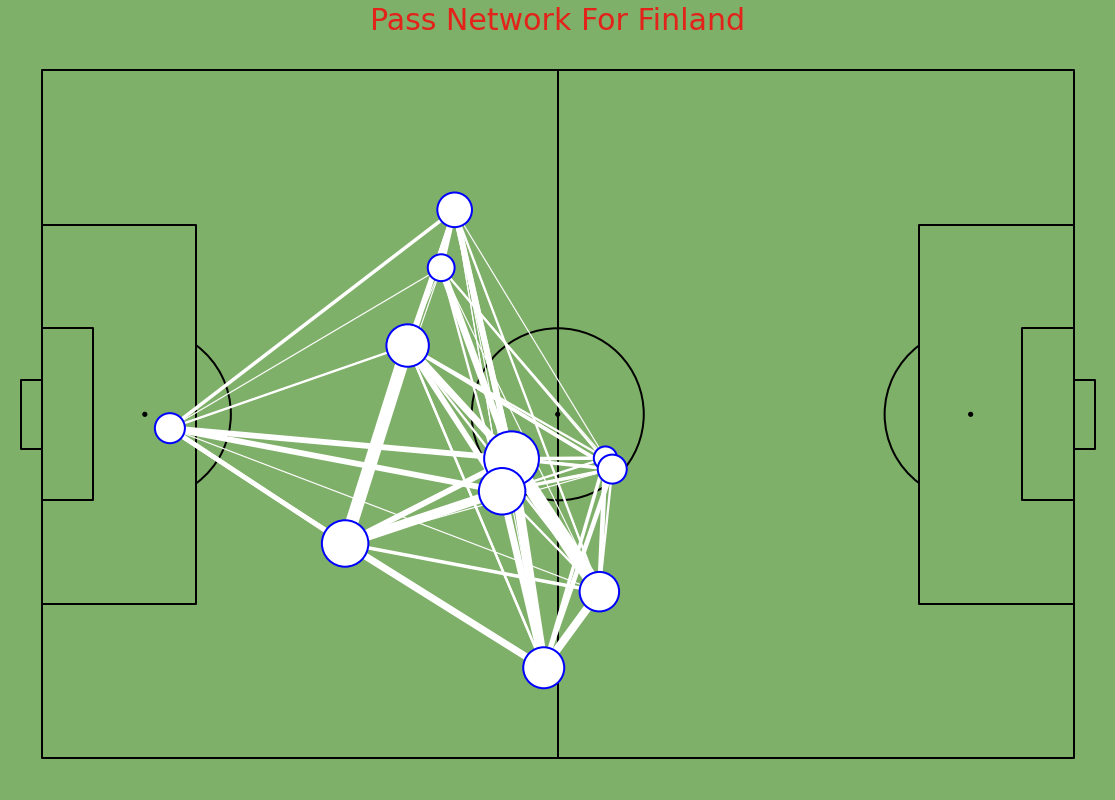

In [29]:
pitch = Pitch(pitch_type='statsbomb', goal_type="box", pitch_color=pitchColor, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)

pitch.arrows(70, 5, 100, 5, ax=axs["pitch"], color="#ECE4B7")

pass_lines = pitch.lines(pass_betweenFin.x_start, pass_betweenFin.y_start,
                         pass_betweenFin.x_start_end, pass_betweenFin.y_start_end, lw=pass_betweenFin.width,
                         zorder=1, ax=ax, color="white")


pass_nodes = pitch.scatter(average_locationsFin.x_start, average_locationsFin.y_start,
                           s=average_locationsFin.marker_size,
                           color='white', edgecolors='blue', linewidth=2, alpha=1, ax=ax, label = "Finland Player")


ax.set_title("Pass Network For Finland", fontsize=30, color="#E32219")

In [30]:
harderEvents = df[df["player"]=="Pernille Mosegaard Harder"]
harderEvents = harderEvents[harderEvents["type"]!= 'Ball Receipt*']
harderEvents = harderEvents[harderEvents["type"]!= 'Injury Stoppage']
harderEvents = harderEvents[harderEvents["type"]!= 'Player Off']
harderEvents = harderEvents[harderEvents["type"]!= 'Player On']
harderEvents = harderEvents[harderEvents["type"]!= 'Substitution']
harderEvents = harderEvents[harderEvents["type"]!= 'Dispossessed']
harderEvents = harderEvents[harderEvents["type"]!= 'Miscontrol']

harderEvents = harderEvents[[ 'player', 'minute', 'second', 'location',  "type", "under_pressure", "dribble_outcome", "duel_type"]]

harderEvents['x'] = harderEvents.location.apply(lambda x: x[0])
harderEvents['y'] = harderEvents.location.apply(lambda x: x[1])
harderEvents = harderEvents.drop('location', axis=1)

BallRecovery = harderEvents[harderEvents.type == 'Ball Recovery']
Interception = harderEvents[harderEvents.type == 'Interception']
Dribble = harderEvents[harderEvents.type == 'Dribble']
Tackle = harderEvents[harderEvents.duel_type == "Tackle"]

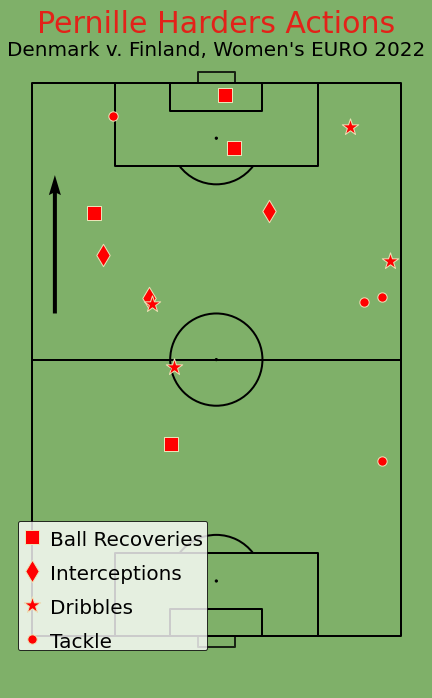

In [31]:
pitch = VerticalPitch(pitch_type='statsbomb', goal_type="box", goal_alpha=0.8, pitch_color=pitchColor, line_color='black')
fig, axs= pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False,title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor(figColor)

pitch.arrows(70, 5, 100, 5, ax=axs["pitch"], color="black")

scatter_recovery = pitch.scatter(BallRecovery.x, BallRecovery.y, c='red', edgecolor = "#ECE4B7", s=200, marker='s',  ax=axs['pitch'], label = "Ball Recoveries")

scatter_interception = pitch.scatter(Interception.x, Interception.y, c='red', s=250, marker='d', edgecolor = "#ECE4B7", ax=axs['pitch'], label = "Interceptions")

scatter_dribble = pitch.scatter(Dribble.x, Dribble.y, c='red', edgecolor="#ECE4B7", s=300, marker='*',  ax=axs['pitch'], label = "Dribbles")

scatter_tackle = pitch.scatter(Tackle.x, Tackle.y, c='red', edgecolor="#ECE4B7", s=350, marker=".",  ax=axs['pitch'], label = "Tackle")

axs["title"].text (0.5, 0.7, "Pernille Harders Actions", color="#E32219", va="center", ha="center", fontsize=30)

axs["title"].text (0.5, 0.25, "Denmark v. Finland, Women's EURO 2022", color="black",  va="center", ha="center", fontsize=20)

legend = axs['pitch'].legend(loc='lower left', labelspacing=1.5, edgecolor="black")
for text in legend.get_texts():
    text.set_fontsize(20)
    text.set_va('center')
#plt.savefig('Harder Actions, Denmark v Finland', dpi=300)

(0.0, 80.0)

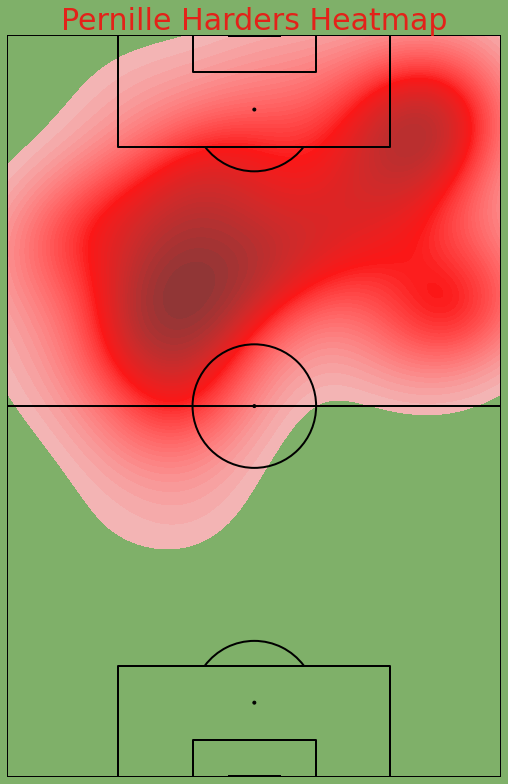

In [32]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor,  line_color='black', line_zorder=2)
fig, ax = pitch.draw(figsize=(16, 11))
fig.set_facecolor(figColor)

kde = pitch.kdeplot(harderEvents.x, harderEvents.y, ax=ax,
                    shade=True, levels=50,
                    shade_lowest=False,
                    cut=4.1,
                    color="red")

ax.set_title("Pernille Harders Heatmap", fontsize=30, color="#E32219")


plt.ylim(0,120)
plt.xlim(0,80)

#plt.savefig('Heat Map for Harder, Denmark v Finland', dpi=300)